In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] = (25, 8)
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['font.size'] = 20


<br>
<h1 align=center> Clustering en Finance</h1>
<h1 align=center> Part 1</h1>
<hr>

In [8]:
action_df=pd.read_csv('./data/yahoofinance-GOOG-20040819-20180120.csv')
action_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [9]:
action_df_30=action_df.iloc[-30:].copy()
action_df_30.describe()

,Open,High,Low,Close,Adj Close,Volume
count,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,1072.241327,1080.150663,1066.982395,1075.326668,1075.326668,1.276247e+06
std,34.586121,33.189547,33.199398,33.831705,33.831705,4.512561e+05
min,1001.500000,1024.969971,1001.140015,1018.380005,1018.380005,7.551000e+05
25%,1047.124970,1055.654999,1044.802521,1048.392517,1048.392517,1.014150e+06
50%,1064.630005,1071.354981,1061.656982,1064.974976,1064.974976,1.270250e+06
75%,1100.947479,1106.043762,1098.719971,1104.792511,1104.792511,1.375450e+06
max,1132.510010,1139.910034,1128.300049,1137.510010,1137.510010,3.275900e+06


In [10]:
print(action_df_30.dtypes)
action_df_30.Date=pd.to_datetime(action_df_30.Date, yearfirst=True, format="%Y-%m-%d")

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


## Add calculated columns

In [11]:
action_df_30['Moyenne']=(action_df_30.High+action_df_30.Low+action_df_30.Close)/3
action_df_30['Variation']=action_df_30.Close-action_df_30.Open
action_df_30['Variation_Relative']=action_df_30.Variation/action_df_30.Moyenne
action_df_30['Ampli_Relative']=(action_df_30.High-action_df_30.Low)/action_df_30.Moyenne
action_df_30['Variation_Jour']=action_df_30.Moyenne.diff()
action_df_30['Variation_Jour_Relative']=action_df_30.Variation_Jour/action_df_30.Moyenne

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


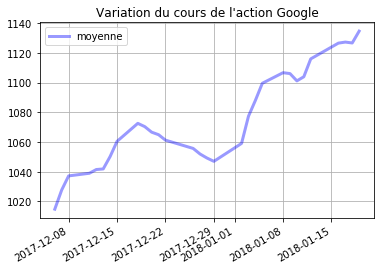

In [12]:
fig, axe = plt.subplots(1)
plt.plot_date(action_df_30["Date"], action_df_30["Moyenne"], fmt="-b", linewidth=3, alpha=.4, label="moyenne")
plt.gcf().autofmt_xdate()
plt.title('Variation du cours de l\'action Google')
plt.grid()
plt.legend(loc='best')
plt.show()

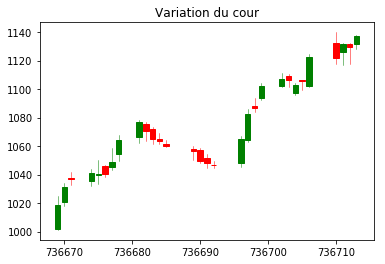

In [13]:
import matplotlib.dates as mdates

quotes=action_df_30
fig,ax=plt.subplots()
candlestick_ohlc(ax,zip(mdates.date2num(quotes.Date),quotes.Open,quotes.High,quotes.Low,quotes.Close), width=0.8, colorup='g', colordown='r')
plt.title('Variation du cour')
plt.show()

## Normalize with l2 

In [14]:
from sklearn.preprocessing import normalize
quotes.set_index('Date', inplace=True)
quotes.isna().sum()
quotes.fillna(0, inplace=True)
quotes=normalize(quotes, axis=1)
type(quotes)

numpy.ndarray

In [15]:
quotes.shape
action_normed=pd.DataFrame(data=quotes, columns=action_df_30.columns)
action_normed.head()

,Open,High,Low,Close,Adj Close,Volume,Moyenne,Variation,Variation_Relative,Ampli_Relative,Variation_Jour,Variation_Jour_Relative
0,0.000787,0.000806,0.000787,0.000801,0.000801,0.999998,0.000798,1.327042e-05,1.307649e-08,1.846044e-08,0.000000,0.000000e+00
1,0.000700,0.000709,0.000698,0.000707,0.000707,0.999999,0.000705,7.200689e-06,7.006286e-09,1.078895e-08,0.000009,8.619024e-09
2,0.000804,0.000807,0.000800,0.000803,0.000803,0.999998,0.000804,-3.408275e-07,-3.286011e-10,7.116719e-09,0.000007,7.066131e-09
3,0.000868,0.000875,0.000865,0.000873,0.000873,0.999998,0.000871,4.694805e-06,4.518653e-09,9.481142e-09,0.000001,1.433065e-09
4,0.000813,0.000821,0.000808,0.000813,0.000813,0.999998,0.000814,6.643011e-07,6.378352e-10,1.247201e-08,0.000002,1.883522e-09


In [19]:
#The function pre_process adds calculated columns to the dataframe and normalizes datas.
#Takes as parameter and returns a dataframe.
def pre_process(df):
    # add calculated columns
    df['Moyenne']=(df.High+df.Low+df.Close)/3
    df['Variation']=df.Close-df.Open
    df['Variation_Relative']=df.Variation/df.Moyenne
    df['Ampli_Relative']=(df.High-df.Low)/df.Moyenne
    df['Variation_Jour']=df.Moyenne.diff()
    df['Variation_Jour_Relative']=df.Variation_Jour/df.Moyenne
    
    return df

In [31]:
import time
import datetime
import requests
import csv
import os

#This function write a csv file in the data folder
def writer_csv(symb, date, lignes):
    file_name=symb+"_"+date.strftime('%Y%m%d')+".csv"
    if not(os.path.isfile('./data/'+file_name)):
        with open('./data/'+file_name, mode='w') as _file:
            writer=csv.writer(_file,delimiter=',',quoting=csv.QUOTE_MINIMAL)
            [writer.writerow([x for x in l.split(',')]) for l in lignes]

#This function download datas from YahooFinance API
# @params: symbol of the company 
#@returns: dataframe
def download(symb,company, write_csv=False):
    # query
    date=datetime.datetime.now()-datetime.timedelta(days=1)
    date_start= date - datetime.timedelta(days=30)
    unix_start="%.0f" % time.mktime(date_start.timetuple())
    unix_end="%.0f" % time.mktime(date.timetuple())
    query="https://query1.finance.yahoo.com/v7/finance/download/"+symb\
    +"?period1="+unix_start+"&period2="+unix_end\
    +"&interval=1d&events=history&crumb=osPYmrnpcIy"
    
    # Use request library 
    response= requests.post(query)
    if (response.ok):
        lignes=response.text.split("\n")
        df=pd.DataFrame([[x for x in l.split(',')] for l in lignes[1:-1]], columns=[x for x in lignes[0].split(',')],dtype='float64')
        df.Date=df.Date.apply(pd.to_datetime)
        df=pre_process(df)
        df['Symbol']=symb
        df['Company']=company
        # Write a csv file if argument write_csv is set to True
        if (write_csv):
            writer_csv(symb,date,lignes)            
        return df
    else:
        print(symb,response.text)



In [32]:
# Get the dictionary actions_dict
exec(open("./data/symboles.txt").read(), locals())

df=pd.concat([download(k,v) for k,v in actions_dict.items()],sort=False)

N {"chart":{"result":null,"error":{"code":"Not Found","description":"No data found, symbol may be delisted"}}}
RAX {"chart":{"result":null,"error":{"code":"Not Found","description":"No data found, symbol may be delisted"}}}
TWX {"chart":{"result":null,"error":{"code":"Not Found","description":"No data found, symbol may be delisted"}}}
BBRY {"chart":{"result":null,"error":{"code":"Not Found","description":"No data found, symbol may be delisted"}}}
CSC {"chart":{"result":null,"error":{"code":"Not Found","description":"No data found, symbol may be delisted"}}}
LXK {"chart":{"result":null,"error":{"code":"Not Found","description":"No data found, symbol may be delisted"}}}
EMC {"chart":{"result":null,"error":{"code":"Not Found","description":"No data found, symbol may be delisted"}}}


In [33]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 21
Data columns (total 15 columns):
Date                       946 non-null datetime64[ns]
Open                       946 non-null float64
High                       946 non-null float64
Low                        946 non-null float64
Close                      946 non-null float64
Adj Close                  946 non-null float64
Volume                     946 non-null float64
Moyenne                    946 non-null float64
Variation                  946 non-null float64
Variation_Relative         946 non-null float64
Ampli_Relative             946 non-null float64
Variation_Jour             903 non-null float64
Variation_Jour_Relative    903 non-null float64
Symbol                     946 non-null object
Company                    946 non-null object
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 118.2+ KB
None


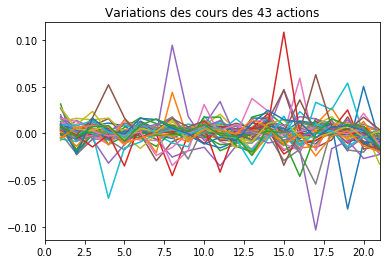

In [34]:
df.groupby('Symbol').Variation_Jour_Relative.plot()
plt.title('Variations des cours des '+str(len(df.Symbol.unique()))+' actions')
plt.show()

In [35]:
df.set_index('Date',inplace=True)
df.to_csv('./data/43actions.csv')

In [36]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Moyenne,Variation,Variation_Relative,Ampli_Relative,Variation_Jour,Variation_Jour_Relative,Symbol,Company
Date,,,,,,,,,,,,,,
2019-04-02,1195.319946,1201.349976,1185.709961,1200.489990,1200.489990,827900.0,1195.849976,5.170044,0.004323,0.013079,NaN,NaN,GOOG,Google
2019-04-03,1207.479980,1216.300049,1200.500000,1205.920044,1205.920044,1017800.0,1207.573364,-1.559936,-0.001292,0.013084,11.723389,0.009708,GOOG,Google
2019-04-04,1205.939941,1215.670044,1204.130005,1215.000000,1215.000000,950000.0,1211.600016,9.060059,0.007478,0.009525,4.026652,0.003323,GOOG,Google
2019-04-05,1214.989990,1216.219971,1205.030029,1207.150024,1207.150024,907200.0,1209.466675,-7.839966,-0.006482,0.009252,-2.133342,-0.001764,GOOG,Google
2019-04-08,1207.890015,1208.689941,1199.859985,1203.839966,1203.839966,860200.0,1204.129964,-4.050049,-0.003363,0.007333,-5.336711,-0.004432,GOOG,Google
